1. Продажи домов
2. Данные о населении 
3. Набор данных для анализа и прогнозирования сердечного приступа

<h4>Продажа домов</h4>

In [83]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df = pd.read_csv("..//static//csv//House.csv", index_col="id")

print(df.columns, "\n")

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object') 



Столбцы для русских:<br>
<br>
<span style="color: #189FFF;">id:</span> Идентификатор объекта<br>
<span style="color: #189FFF;">date:</span> Дата продажи<br>
<span style="color: #189FFF;">price:</span> Цена недвижимости<br>
<span style="color: #189FFF;">bedrooms:</span> Количество спален<br>
<span style="color: #189FFF;">bathrooms:</span> Количество ванных комнат<br>
<span style="color: #189FFF;">sqft_living:</span> Жилая площадь<br>
<span style="color: #189FFF;">sqft_lot:</span> Площадь участка<br>
<span style="color: #189FFF;">floors:</span> Количество этажей<br>
<span style="color: #189FFF;">waterfront:</span> Признак наличия вида на водоем<br>
<span style="color: #189FFF;">view:</span> Оценка вида<br>
<span style="color: #189FFF;">condition:</span> Состояние дома<br>
<span style="color: #189FFF;">grade:</span> Оценка конструкции<br>
<span style="color: #189FFF;">sqft_above:</span> Площадь надземных помещений<br>
<span style="color: #189FFF;">sqft_basement:</span> Площадь подвала<br>
<span style="color: #189FFF;">yr_built:</span> Год постройки<br>
<span style="color: #189FFF;">yr_renovated:</span> Год последнего ремонта<br>
<span style="color: #189FFF;">zipcode:</span> Почтовый индекс<br>
<span style="color: #189FFF;">lat:</span> Широта<br>
<span style="color: #189FFF;">long:</span> Долгота<br>
<span style="color: #189FFF;">sqft_living15:</span> Жилая площадь соседних домов<br>
<span style="color: #189FFF;">sqft_lot15:</span> Площадь участка соседних домов<br>
<br>
Проблемная область: Прогнозирование стоимости недвижимости в зависимости от характеристик дома.<br>

In [84]:
print(df.info, "\n")

<bound method DataFrame.info of                        date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00         1180   
6414100192  20141209T000000  538000.0         3       2.25         2570   
5631500400  20150225T000000  180000.0         2       1.00          770   
2487200875  20141209T000000  604000.0         4       3.00         1960   
1954400510  20150218T000000  510000.0         3       2.00         1680   
...                     ...       ...       ...        ...          ...   
263000018   20140521T000000  360000.0         3       2.50         1530   
6600060120  20150223T000000  400000.0         4       2.50         2310   
1523300141  20140623T000000  402101.0         2       0.75         1020   
291310100   20150116T000000  400000.0         3       2.50         1600   
1523300157  20141015T000000  325000.0         2       0.75         1

Объектом наблюдения является - Недвижимость<br>
Атрибуты - содержит набор информации о продаже дома, такие как:<br>
цену продажи, дата продажи, количество спален, ванных комнат, общую площадь дома, площадь участка, местоположение.


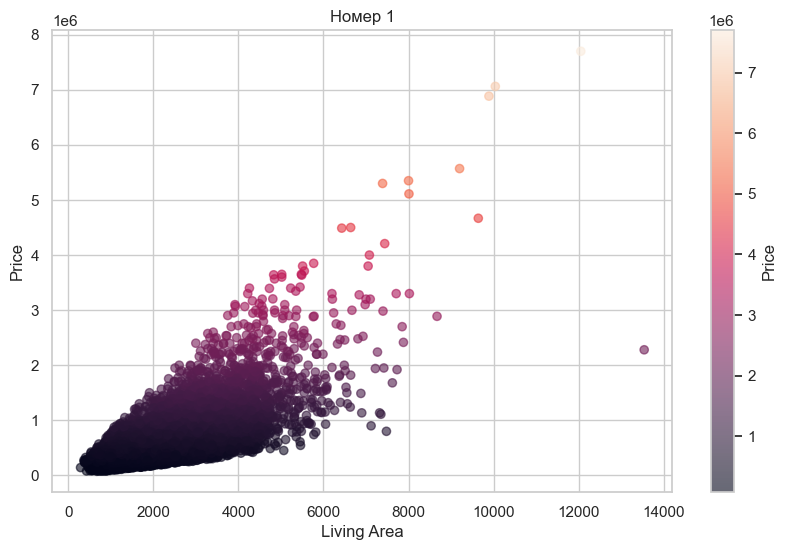

In [85]:
plt.figure(figsize=(10, 6))

plt.scatter(df['sqft_living'], df['price'], c=df['price'], alpha=0.6)
plt.colorbar(label='Price')

plt.title("Номер 1")
plt.ylabel("Price")
plt.xlabel("Living Area")
plt.grid(visible='true')

plt.show()


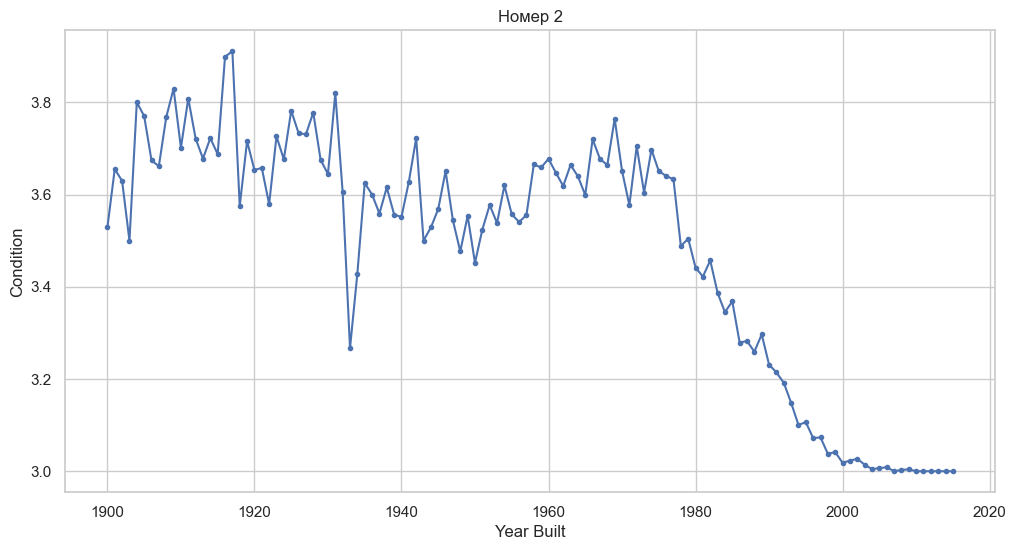

In [86]:
year_condition = df.groupby('yr_built')['condition'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.plot(year_condition['yr_built'], year_condition['condition'], marker='.')

plt.title("Номер 2")
plt.xlabel("Year Built")
plt.ylabel("Condition")


plt.show()

Связь между объектами есть. Цена связана почти со всеми характиристиками дома.<br> Например на графике номер один показана зависимоость между ценой и размером дома.<br> А на графике номер 2 показа зависимость состояния домов с годами.

<h3>Примеры бизнес целей</h3>

1. Прогнозирование стоимости недвижимости на основе характиристик дома.
2. Наблюдение за изменениями характиристик дома с годами.

Эффект для бизнеса: Оценка и оптимизация цен, Оценка и планирование затрат, выявление тенденции на рынке, стратегия планирования.

<h3>Цели технического проекта</h3>
<ul>Для первой цели:</ul>
        <li>Вход: Характеристики недвижимости</li>
        <li>Целевой признак: Цена.</li>
<ul>Для второй цели:</ul>
        <li>Вход: оценка конструкции, Состояние дома</li>
        <li>Целевой признак: Год постройки</li>

<h3>Код ниже нужен для определения проблем данных</h3>

In [87]:
max_value = df.max(axis=0)

columns_with_zero = df.columns[(df == 0).any()]

numeric_data = df.select_dtypes(include='number')
shum = numeric_data.var()
low_dispers = 0.1
low_var_columns = shum[shum < low_dispers]


year = df['yr_built']

print(max_value, "\n")
print(columns_with_zero, "\n")
print("Признаки с низкой дисперсией:\n", low_var_columns, "\n")
print(year)


date             20150527T000000
price                  7700000.0
bedrooms                      33
bathrooms                    8.0
sqft_living                13540
sqft_lot                 1651359
floors                       3.5
waterfront                     1
view                           4
condition                      5
grade                         13
sqft_above                  9410
sqft_basement               4820
yr_built                    2015
yr_renovated                2015
zipcode                    98199
lat                      47.7776
long                    -121.315
sqft_living15               6210
sqft_lot15                871200
dtype: object 

Index(['bedrooms', 'bathrooms', 'waterfront', 'view', 'sqft_basement',
       'yr_renovated'],
      dtype='object') 

Признаки с низкой дисперсией:
 waterfront    0.007485
lat           0.019200
long          0.019833
dtype: float64 

id
7129300520    1955
6414100192    1951
5631500400    1933
2487200875    1965
195440051

<ul><h4>Из полученных данных выяснилось:</h4></ul>
    <li>признаки bedrooms, bathrooms, waterfront, view, sqft_basement и yr_renovated имеют в себе нулевые поля, что может создать смещение если искать по этим полям</li>
    <li>признаки bedrooms, bathrooms и price имеют аномально высокие значения, и это указывает на наличие выбросов</li>
    <li>признаки waterfront, view, condition имеют низкие значения дисперсии, что может привести к снижению значимости этих признаков</li>
    <li>признак yr_built варьируется от 1900 до 2015. Это может быть актуальной информацией для анализа старых зданий, но актуальность данных по ремонту и реконструкции (это призгак yr_renovated) может быть ниже, так как 0 указывает на отсутствие ремонта</li>


<ol><h3>Примеры решения проблем для набора данных</h3></ol>
    <li>Удаление выбросов на основе значения или bathrooms > 5</li>
    <li>Замена 0 на год постройки (это признак yr_built), если дом не подвергался ремонту</li>



<h3>Оценка качества данных</h3>
1. Информативность. Набор данных предоставляет достаточную информацию для анализа цен на недвижимость.
2. Степень покрытия. Набор данных затрагивает только один райно, не включая информацию о других райнов.
3. Соответствие реальным данным. Данные вполне кажутся реальными, не считая некоторых редких выбросов.
4. Согласованность меток. Метки состояние и оценка вида, имеют четкие значения.

<h3>Разбиение данных на обучающую, контрольную и тестовую выборки</h3>

In [88]:
df_numeric = df.select_dtypes(include='number')

x = df_numeric.drop(['price'], axis=1)
y = df_numeric['price']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=14)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=14)

print(f"Исходный размер строк: {df_numeric.shape[0]} строк")
print(f"Размер обучающей выборки: {x_train.shape[0]} строк")
print(f"Размер валидационной выборки: {x_val.shape[0]} строк")
print(f"Размер тестовой выборки: {x_test.shape[0]} строк")

Исходный размер строк: 21613 строк
Размер обучающей выборки: 15129 строк
Размер валидационной выборки: 3242 строк
Размер тестовой выборки: 3242 строк


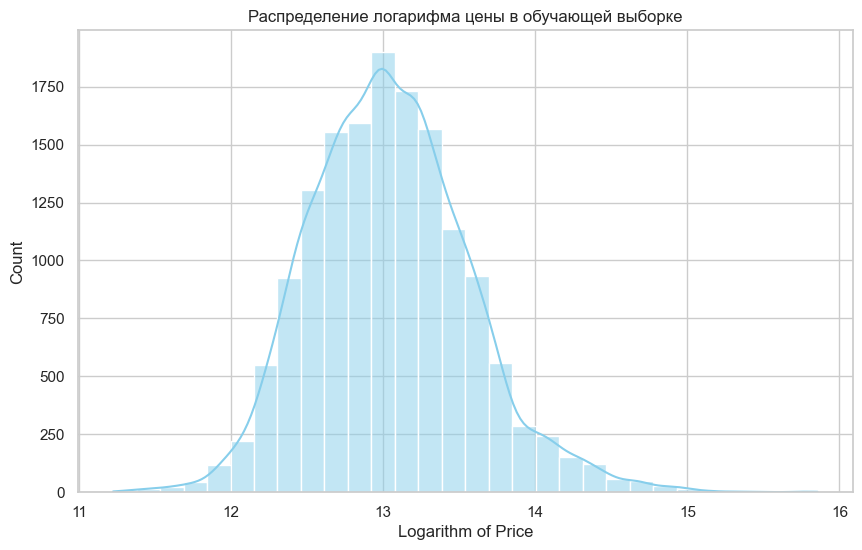

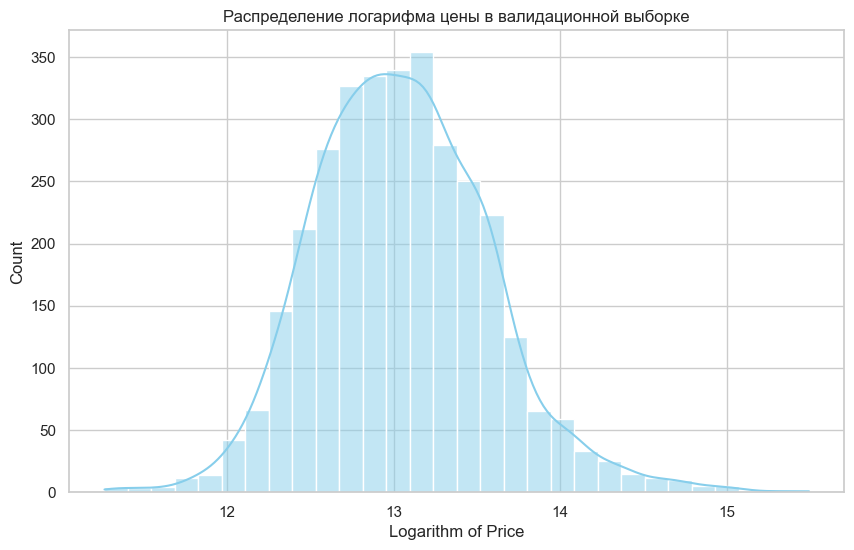

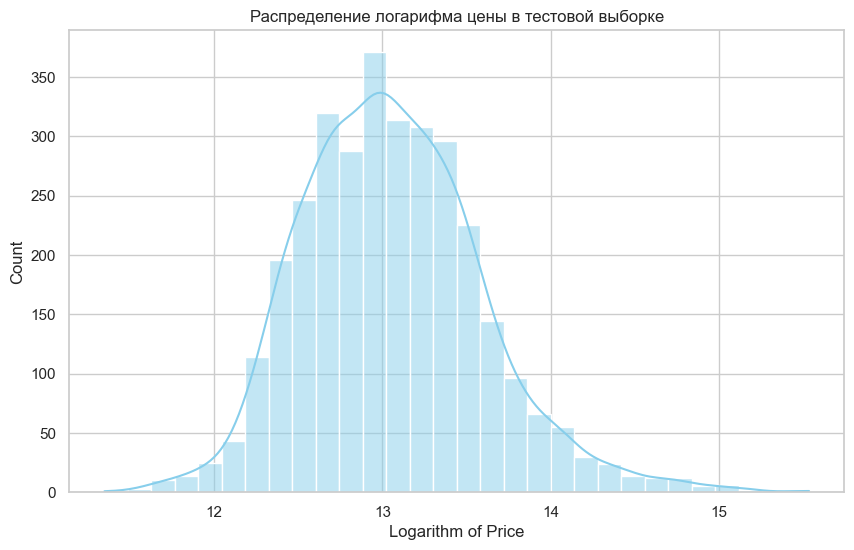

Статистические показатели для обучающей выборки:
Среднее значение: 13.05
Стандартное отклонение: 0.52
Минимальное значение: 11.23
Максимальное значение: 15.86
Количество наблюдений: 15129

Статистические показатели для валидационной выборки:
Среднее значение: 13.05
Стандартное отклонение: 0.53
Минимальное значение: 11.26
Максимальное значение: 15.49
Количество наблюдений: 3242

Статистические показатели для тестовой выборки:
Среднее значение: 13.06
Стандартное отклонение: 0.54
Минимальное значение: 11.35
Максимальное значение: 15.53
Количество наблюдений: 3242



In [89]:
import seaborn as sns

df['price_log'] = np.log(df['price'])

X = df.drop(['price', 'price_log'], axis=1)
y = df['price_log']

X = X.select_dtypes(include='number')

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
def plot_distribution(data, title):
    """Построение гистограммы распределения целевого признака"""
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, bins=30, color='skyblue')
    plt.title(title)
    plt.xlabel('Logarithm of Price')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

plot_distribution(y_train, 'Распределение логарифма цены в обучающей выборке')
plot_distribution(y_val, 'Распределение логарифма цены в валидационной выборке')
plot_distribution(y_test, 'Распределение логарифма цены в тестовой выборке')

def get_statistics(df, name):
    print(f"Статистические показатели для {name} выборки:")
    print(f"Среднее значение: {df.mean():.2f}")
    print(f"Стандартное отклонение: {df.std():.2f}")
    print(f"Минимальное значение: {df.min():.2f}")
    print(f"Максимальное значение: {df.max():.2f}")
    print(f"Количество наблюдений: {df.count()}\n")

get_statistics(y_train, "обучающей")

get_statistics(y_val, "валидационной")

get_statistics(y_test, "тестовой")

<h3>Oversampling и undersampling</h3>

In [90]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


if 'date' in df.columns:
    df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year
    df = df.drop(['date'], axis=1)

df['price_log'] = np.log(df['price'])

df['price_category'] = pd.qcut(df['price_log'], q=5, labels=[0, 1, 2, 3, 4])

X = df.drop(['price', 'price_log', 'price_category'], axis=1)
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Распределение классов после SMOTE (oversampling):")
print(pd.Series(y_train_smote).value_counts())

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Распределение классов после RandomUnderSampler (undersampling):")
print(pd.Series(y_train_under).value_counts())


Распределение классов после SMOTE (oversampling):
price_category
0    3054
1    3054
2    3054
3    3054
4    3054
Name: count, dtype: int64
Распределение классов после RandomUnderSampler (undersampling):
price_category
0    2993
1    2993
2    2993
3    2993
4    2993
Name: count, dtype: int64


<h3>Оценка сбалансированности выборок</h3>

Оценка необходимости аугментации данных


In [91]:
def check_augmentation_need(data, name):
    """Проверка необходимости аугментации данных"""
    quantiles = data.quantile([0.25, 0.5, 0.75])
    mean = data.mean()
    std = data.std()
    
    print(f"Проверка необходимости аугментации для {name} выборки:")
    print(f"Среднее значение: {mean:.2f}, Стандартное отклонение: {std:.2f}")
    print(f"25-й квантиль: {quantiles[0.25]:.2f}")
    print(f"50-й квантиль (медиана): {quantiles[0.5]:.2f}")
    print(f"75-й квантиль: {quantiles[0.75]:.2f}")
    
    if std > mean * 0.5:
        print(f"Выборка {name} несбалансирована, рекомендуется аугментация.\n")
    else:
        print(f"Выборка {name} сбалансирована, аугментация не требуется.\n")

check_augmentation_need(y_train, "обучающей")
check_augmentation_need(y_val, "валидационной")
check_augmentation_need(y_test, "тестовой")


AssertionError: 

Поскольку все выборки демонстрируют одинаковое распределение целевого признака и сбалансированное распределение значений, применение методов аугментации не требуется.

Распределение 'condition' в обучающей выборке:
 condition
3    9837
4    3958
5    1189
2     121
1      24
Name: count, dtype: int64


C:\Users\salih\AppData\Local\Temp\ipykernel_8140\3337968062.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='viridis')


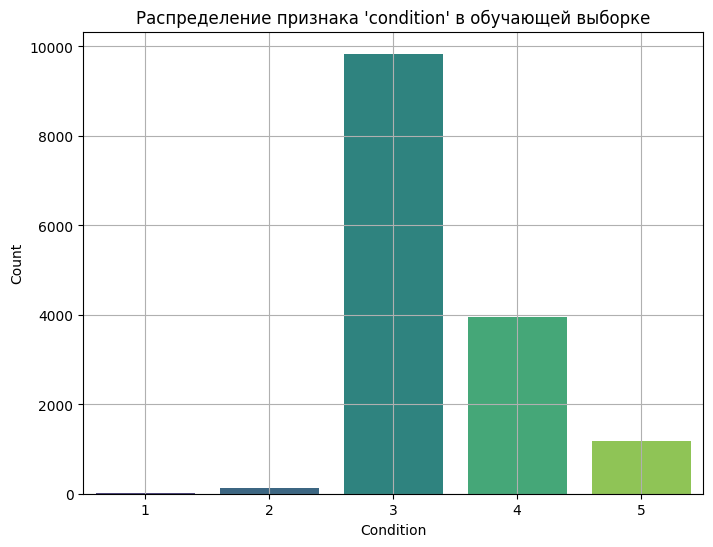

Распределение 'condition' в валидационной выборке:
 condition
3    2125
4     830
5     256
2      27
1       4
Name: count, dtype: int64


C:\Users\salih\AppData\Local\Temp\ipykernel_8140\3337968062.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='viridis')


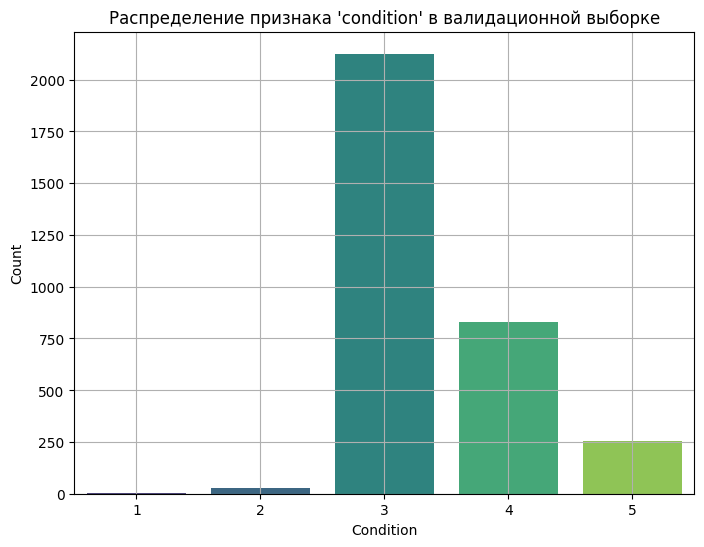

Распределение 'condition' в тестовой выборке:
 condition
3    2069
4     891
5     256
2      24
1       2
Name: count, dtype: int64


C:\Users\salih\AppData\Local\Temp\ipykernel_8140\3337968062.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='viridis')


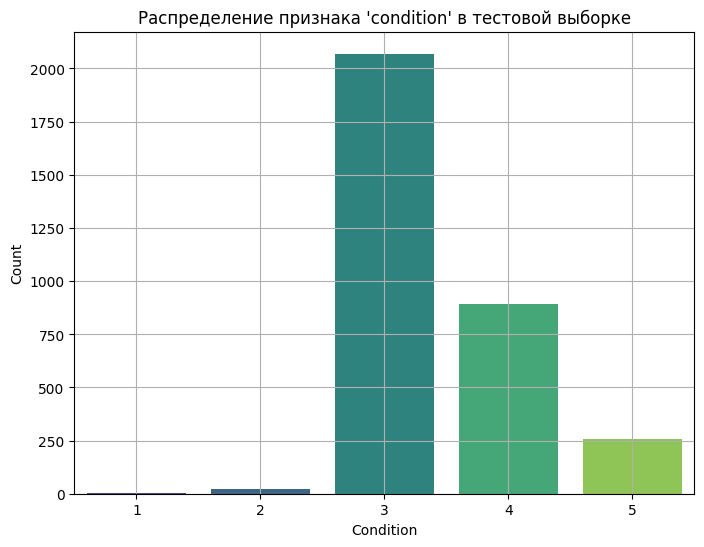

Проверка необходимости аугментации для признака 'condition' в обучающей выборке:
Минимальное количество наблюдений в классе: 24
Максимальное количество наблюдений в классе: 9837
Выборка 'обучающей' несбалансирована, рекомендуется аугментация.

Проверка необходимости аугментации для признака 'condition' в валидационной выборке:
Минимальное количество наблюдений в классе: 4
Максимальное количество наблюдений в классе: 2125
Выборка 'валидационной' несбалансирована, рекомендуется аугментация.

Проверка необходимости аугментации для признака 'condition' в тестовой выборке:
Минимальное количество наблюдений в классе: 2
Максимальное количество наблюдений в классе: 2069
Выборка 'тестовой' несбалансирована, рекомендуется аугментация.

Распределение классов после SMOTE (oversampling):
condition
3    9837
5    9837
4    9837
2    9837
1    9837
Name: count, dtype: int64
Распределение классов после RandomUnderSampler (undersampling):
condition
1    24
2    24
3    24
4    24
5    24
Name: count, d

In [192]:
if 'condition' in df.columns:
    X_train, X_temp, y_train, y_temp = train_test_split(df.drop(['price'], axis=1), df['condition'], test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    def analyze_condition_distribution(data, name):
        """Проверка и визуализация распределения признака 'condition'"""
        condition_counts = data.value_counts()
        print(f"Распределение 'condition' в {name} выборке:\n", condition_counts)
        
        plt.figure(figsize=(8, 6))
        sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='viridis')
        plt.title(f"Распределение признака 'condition' в {name} выборке")
        plt.xlabel('Condition')
        plt.ylabel('Count')
        plt.grid(True)
        plt.show()

    analyze_condition_distribution(y_train, 'обучающей')
    analyze_condition_distribution(y_val, 'валидационной')
    analyze_condition_distribution(y_test, 'тестовой')

    def check_condition_augmentation(data, name):
        print(f"Проверка необходимости аугментации для признака 'condition' в {name} выборке:")
        min_count = data.value_counts().min()
        max_count = data.value_counts().max()
        print(f"Минимальное количество наблюдений в классе: {min_count}")
        print(f"Максимальное количество наблюдений в классе: {max_count}")
        
        if max_count > min_count * 1.5:
            print(f"Выборка '{name}' несбалансирована, рекомендуется аугментация.\n")
        else:
            print(f"Выборка '{name}' сбалансирована, аугментация не требуется.\n")

    check_condition_augmentation(y_train, 'обучающей')
    check_condition_augmentation(y_val, 'валидационной')
    check_condition_augmentation(y_test, 'тестовой')
else:
    print("Признак 'condition' отсутствует в данных.")

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Распределение классов после SMOTE (oversampling):")
print(pd.Series(y_train_smote).value_counts())

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Распределение классов после RandomUnderSampler (undersampling):")
print(pd.Series(y_train_under).value_counts())


В этом исследование данные не сбалансированы, поэтому требуется аугментация.

<h2>Данные о населении</h2>

In [71]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df2 = pd.read_csv("..//static//csv//WorldPopulation.csv", index_col="no")

print(df2.head(), "\n")
print(*list(df2.columns), sep='\n')

   Country (or dependency) Population 2020 Yearly Change  Net Change  \
no                                                                     
1                    China   1,439,323,776         0.39%   5,540,090   
2                    India   1,380,004,385         0.99%  13,586,631   
3            United States     331,002,651         0.59%   1,937,734   
4                Indonesia     273,523,615         1.07%   2,898,047   
5                 Pakistan     220,892,340         2.00%   4,327,022   

   Density  (P/Km²) Land Area (Km²) Migrants (net) Fert. Rate Med. Age  \
no                                                                       
1               153       9,388,211       -348,399        1.7       38   
2               464       2,973,190       -532,687        2.2       28   
3                36       9,147,420        954,806        1.8       38   
4               151       1,811,570        -98,955        2.3       30   
5               287         770,880       -233,379 

Объектом наблюдения является страны и информация о их наслении.<br>
Атрибуты объекта: Страна, Население, Годовое изменение, NetChange, Плотность, Площадь суши, Мигранты, Fert.Rate, Средний возраст, UrbanPop%, Доля в мире;<br>
Связь между объектами: имеется связь между атрибутами, например между Коэффициент фертильности и Плотностю населения.<br>

C:\Users\salih\AppData\Local\Temp\ipykernel_15148\3959616127.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Density  (P/Km²)'] = pd.cut(df2['Density  (P/Km²)'], bins=range(0, 1000, 100))


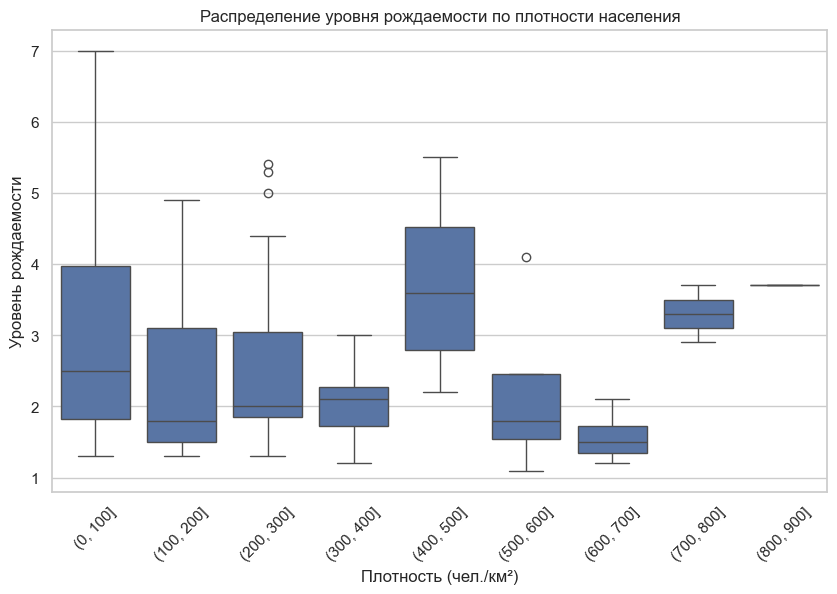

In [101]:
df2['Fert. Rate'] = pd.to_numeric(df2['Fert. Rate'], errors='coerce')


df2['Fert. Rate'] = pd.to_numeric(df2['Fert. Rate'], errors='coerce')

df_clean = df2.dropna(subset=['Fert. Rate', 'Density  (P/Km²)'])
    
## correlation = df_clean[['Density  (P/Km²)', 'Fert. Rate']].corr().iloc[0, 1] ## использовать только один раз потом удалить

df_clean['Density  (P/Km²)'] = pd.cut(df2['Density  (P/Km²)'], bins=range(0, 1000, 100))
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Density  (P/Km²)', y='Fert. Rate')
plt.title('Распределение уровня рождаемости по плотности населения')
plt.xlabel('Плотность (чел./км²)')
plt.ylabel('Уровень рождаемости')
plt.xticks(rotation=45)
plt.show()


plt.show()

In [ ]:
df2['Med. Age'] = pd.to_numeric(df2['Med. Age'], errors='coerce')


df2['Med. Age'] = pd.to_numeric(df2['Med. Age'], errors='coerce')

df_clean = df2.dropna(subset=['Fert. Rate', 'Density  (P/Km²)'])
    
## correlation = df_clean[['Density  (P/Km²)', 'Fert. Rate']].corr().iloc[0, 1] ## использовать только один раз потом удалить

df_clean['Density  (P/Km²)'] = pd.cut(df2['Density  (P/Km²)'], bins=range(0, 1000, 100))
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Density  (P/Km²)', y='Fert. Rate')
plt.title('Распределение уровня рождаемости по плотности населения')
plt.xlabel('Плотность (чел./км²)')
plt.ylabel('Уровень рождаемости')
plt.xticks(rotation=45)
plt.show()


plt.show()